In [71]:
import sys

import matplotlib.pyplot as plt
import json

import numpy as np
import pandas as pd

import dysts
from dysts.flows import *
from dysts.base import *
from dysts.utils import *
from dysts.analysis import *

# try:
#     from private.lyap import lyap_r, lyap_e, corr_dim
# except:
#     from nolds import lyap_r, lyap_e, corr_dim

import degas as dg
dg.set_style()

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
# get data
with open("results/symbolic_scores_sweep.json", "r") as file:
    data = json.load(file)
    
data = pd.DataFrame(data).transpose()

In [91]:
attributes =  ['maximum_lyapunov_estimated', 'kaplan_yorke_dimension', 'pesin_entropy', 'correlation_dimension']

Index(['Aizawa', 'AnishchenkoAstakhov', 'Arneodo', 'ArnoldBeltramiChildress',
       'ArnoldWeb', 'BeerRNN', 'BelousovZhabotinsky', 'BickleyJet', 'Blasius',
       'BlinkingRotlet',
       ...
       'Torus', 'Tsucs2', 'TurchinHanski', 'VallisElNino', 'VossDelay',
       'WangSun', 'WindmiReduced', 'YuWang', 'YuWang2', 'ZhouChen'],
      dtype='object', length=131)

In [125]:


all_properties = dict()
model_names = ["SINDY-poly", "SINDY-fourier", "pySR", "DSR"]
attributes =  ['maximum_lyapunov_estimated', 'kaplan_yorke_dimension', 'pesin_entropy', 'correlation_dimension']
for equation_name in data.index:
    eq = getattr(dysts.flows, equation_name)()
    attr_vals = [getattr(eq, item) for item in attributes]
    
    all_properties[equation_name] = dict(zip(attributes, attr_vals))
all_properties = pd.DataFrame(all_properties).transpose()

data = pd.merge(data, all_properties, how="outer", left_index=True, right_index=True)

#     try:
        
#         for model_name in data[equation_name]:
#             if data[equation_name][model_name] is None:
#                 data[equation_name][model_name] = np.nan
#         all_vals.append((data[equation_name]['SINDY-poly'], data[equation_name]['SINDY-fourier'], data[equation_name]['pySR'], data[equation_name]['DSR']))

        
#         for attribute_name in attributes:
#         all_properties.append(eq.multiscale_entropy)

#     except:
#         pass

# all_vals = np.array(all_vals)

<AxesSubplot:>

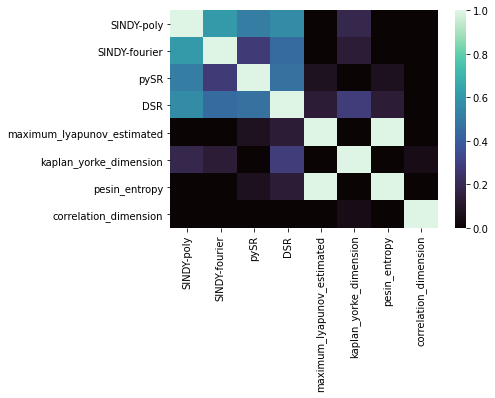

In [151]:
sns.heatmap(data[model_names + attributes].corr(method="pearson"), vmin=0, vmax=1, cmap="mako")

In [118]:
dict(zip(attributes, attr_vals))

{'maximum_lyapunov_estimated': 0.5917259125455694,
 'kaplan_yorke_dimension': 2.045920730005392,
 'pesin_entropy': 0.5969734164748293,
 'correlation_dimension': 1.6212203970681585}

In [116]:
all_properties

,Aizawa,AnishchenkoAstakhov,Arneodo,ArnoldBeltramiChildress,ArnoldWeb,BeerRNN,BelousovZhabotinsky,BickleyJet,Blasius,BlinkingRotlet,...,Torus,Tsucs2,TurchinHanski,VallisElNino,VossDelay,WangSun,WindmiReduced,YuWang,YuWang2,ZhouChen
maximum_lyapunov_estimated,maximum_lyapunov_estimated,maximum_lyapunov_estimated,maximum_lyapunov_estimated,maximum_lyapunov_estimated,maximum_lyapunov_estimated,maximum_lyapunov_estimated,maximum_lyapunov_estimated,maximum_lyapunov_estimated,maximum_lyapunov_estimated,maximum_lyapunov_estimated,...,maximum_lyapunov_estimated,maximum_lyapunov_estimated,maximum_lyapunov_estimated,maximum_lyapunov_estimated,maximum_lyapunov_estimated,maximum_lyapunov_estimated,maximum_lyapunov_estimated,maximum_lyapunov_estimated,maximum_lyapunov_estimated,maximum_lyapunov_estimated
kaplan_yorke_dimension,kaplan_yorke_dimension,kaplan_yorke_dimension,kaplan_yorke_dimension,kaplan_yorke_dimension,kaplan_yorke_dimension,kaplan_yorke_dimension,kaplan_yorke_dimension,kaplan_yorke_dimension,kaplan_yorke_dimension,kaplan_yorke_dimension,...,kaplan_yorke_dimension,kaplan_yorke_dimension,kaplan_yorke_dimension,kaplan_yorke_dimension,kaplan_yorke_dimension,kaplan_yorke_dimension,kaplan_yorke_dimension,kaplan_yorke_dimension,kaplan_yorke_dimension,kaplan_yorke_dimension
pesin_entropy,pesin_entropy,pesin_entropy,pesin_entropy,pesin_entropy,pesin_entropy,pesin_entropy,pesin_entropy,pesin_entropy,pesin_entropy,pesin_entropy,...,pesin_entropy,pesin_entropy,pesin_entropy,pesin_entropy,pesin_entropy,pesin_entropy,pesin_entropy,pesin_entropy,pesin_entropy,pesin_entropy
correlation_dimension,correlation_dimension,correlation_dimension,correlation_dimension,correlation_dimension,correlation_dimension,correlation_dimension,correlation_dimension,correlation_dimension,correlation_dimension,correlation_dimension,...,correlation_dimension,correlation_dimension,correlation_dimension,correlation_dimension,correlation_dimension,correlation_dimension,correlation_dimension,correlation_dimension,correlation_dimension,correlation_dimension


In [114]:
dict(zip(attributes, attr_vals))

{'maximum_lyapunov_estimated': 0.5917259125455694,
 'kaplan_yorke_dimension': 2.045920730005392,
 'pesin_entropy': 0.5969734164748293,
 'correlation_dimension': 1.6212203970681585}

In [113]:
all_properties

,maximum_lyapunov_estimated,kaplan_yorke_dimension,pesin_entropy,correlation_dimension
Aizawa,maximum_lyapunov_estimated,kaplan_yorke_dimension,pesin_entropy,correlation_dimension
AnishchenkoAstakhov,maximum_lyapunov_estimated,kaplan_yorke_dimension,pesin_entropy,correlation_dimension
Arneodo,maximum_lyapunov_estimated,kaplan_yorke_dimension,pesin_entropy,correlation_dimension
ArnoldBeltramiChildress,maximum_lyapunov_estimated,kaplan_yorke_dimension,pesin_entropy,correlation_dimension
ArnoldWeb,maximum_lyapunov_estimated,kaplan_yorke_dimension,pesin_entropy,correlation_dimension
...,...,...,...,...
WangSun,maximum_lyapunov_estimated,kaplan_yorke_dimension,pesin_entropy,correlation_dimension
WindmiReduced,maximum_lyapunov_estimated,kaplan_yorke_dimension,pesin_entropy,correlation_dimension
YuWang,maximum_lyapunov_estimated,kaplan_yorke_dimension,pesin_entropy,correlation_dimension
YuWang2,maximum_lyapunov_estimated,kaplan_yorke_dimension,pesin_entropy,correlation_dimension


In [90]:
data

,DSR,DSR-time,SINDY-fourier,SINDY-fourier-time,SINDY-poly,SINDY-poly-time,pySR,pySR-time
Aizawa,3.249331e-01,5361.771297,0.388293,0.009932,0.131491,0.006207,4.751207e-06,1387.807501
AnishchenkoAstakhov,1.436066e-01,3221.558293,0.764143,0.014582,0.304306,0.007079,2.875846e-07,1286.368810
Arneodo,1.413602e-17,2036.648555,0.917730,0.013027,0.043507,0.008142,0.000000e+00,1495.600544
ArnoldBeltramiChildress,1.546481e-01,4580.716868,1.668508,0.062753,1.734974,0.456489,1.339280e-07,2154.610185
ArnoldWeb,9.986501e-02,3291.492841,2.000000,0.039134,2.000000,0.515162,3.027251e-02,2246.691568
...,...,...,...,...,...,...,...,...
WangSun,9.921188e-01,7299.893262,2.000000,0.008599,1.125077,0.011500,0.000000e+00,1208.652250
WindmiReduced,7.043811e-01,7479.440121,0.690714,0.014131,0.880745,0.044827,2.079038e-06,1560.164032
YuWang,2.220408e-01,7916.629846,1.065476,0.011153,0.891156,0.010294,1.000000e-07,1294.967133
YuWang2,4.758330e-01,4838.172874,0.894389,0.009378,0.284701,0.009987,8.953337e-07,1325.018273


In [156]:
model_names = ["SINDY-poly", "SINDY-fourier", "pySR", "DSR"]

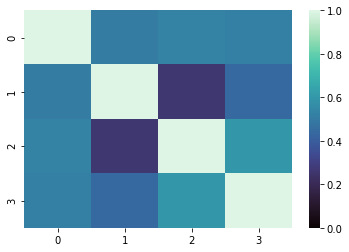

In [82]:
import seaborn as sns

ax = sns.heatmap(pd.DataFrame(all_vals).corr(method="spearman"), cmap="mako", vmin=0, vmax=1)

# dg.fixed_aspect_ratio(1, ax=ax)

In [67]:
all_lowest_scores = np.nanmin(all_vals, axis=1)

In [68]:
all_lowest_scores

array([4.75120693e-06, 2.87584559e-07, 0.00000000e+00, 1.33928046e-07,
       3.02725060e-02, 7.53056808e-01, 3.09313911e-01, 1.59508208e-01,
       1.72336496e-01, 1.12953714e+00, 1.17586347e+00, 7.67534676e-06,
       2.49996906e-07, 4.50001013e-06, 1.82722778e-01, 2.27054044e-01,
       1.48684930e+00, 1.37107767e-01, 2.28571402e-07, 1.95454788e-07,
       0.00000000e+00, 1.28712338e-01, 1.38801810e+00, 2.56689114e-01,
       0.00000000e+00, 1.07707131e-05, 1.20543997e-06, 5.85676035e-01,
       3.90952495e-01, 1.24810715e-02, 1.04454844e+00, 5.70820380e-07,
       1.80161260e-02, 4.85633188e-02, 5.84801080e-01, 6.78525497e-03,
       0.00000000e+00, 2.99365678e-01, 2.92458287e-05, 3.06709870e-05,
       1.10878950e+00, 5.57454122e-18, 1.71389866e-06, 5.66396304e-01,
       1.90869705e-07, 4.84840036e-06, 2.23519994e-06, 6.50002956e-07,
       0.00000000e+00, 0.00000000e+00, 4.26235042e-06, 1.08920647e-07,
       9.08180010e-08, 3.93331756e-07, 3.01068331e-01, 3.03472134e-07,
      

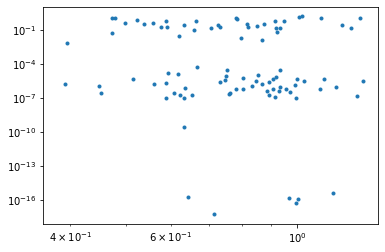

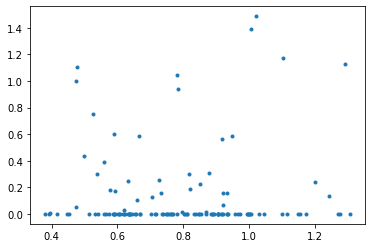

In [69]:
all_lowest_scores = all_vals[:, 2]
all_lowest_scores = np.nanmin(all_vals, axis=1)

plt.figure()
plt.loglog(all_properties, all_lowest_scores, '.')

plt.figure()
plt.plot(all_properties, all_lowest_scores, '.')

In [18]:
all_lowest_scores = np.min(all_vals, axis=1)



np.array(list(data.keys()))[np.argsort(all_lowest_scores)]

array(['SprottO', 'SprottN', 'Colpitts', 'SprottMore', 'ScrollDelay',
       'ShimizuMorioka', 'SprottA', 'SprottJerk', 'SprottC', 'SprottJ',
       'SprottH', 'ForcedVanDerPol', 'SprottF', 'SprottE', 'SprottDelay',
       'HyperLu', 'HyperLorenz', 'SprottI', 'SprottP', 'SprottB',
       'ItikBanksTumor', 'NewtonLiepnik', 'Arneodo', 'VallisElNino',
       'MooreSpiegel', 'MackeyGlass', 'ChenLee', 'RikitakeDynamo',
       'Laser', 'SprottR', 'LuChen', 'HastingsPowell', 'SprottD',
       'SaltonSea', 'KawczynskiStrizhak', 'RayleighBenard', 'Rossler',
       'LiuChen', 'SprottG', 'SprottQ', 'HyperRossler', 'WangSun',
       'HyperQi', 'ArnoldBeltramiChildress', 'PanXuZhou', 'Hopfield',
       'Chen', 'CellularNeuralNetwork', 'Rucklidge', 'Bouali',
       'AnishchenkoAstakhov', 'HyperYan', 'HyperYangChen',
       'PiecewiseCircuit', 'HyperWang', 'StickSlipOscillator', 'Tsucs2',
       'ExcitableCell', 'SprottS', 'OscillatingFlow', 'HyperJha',
       'SprottM', 'WindmiReduced', 'LorenzBound

In [164]:
np.max(data_long["value"])

2.0

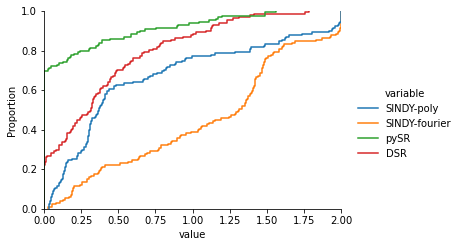

In [192]:
data_long = pd.melt(data, value_vars=model_names)
# sns.displot(data_long, x="value", hue="variable", multiple="stack", kind="kde")
# sns.displot(data_long, x="value", hue="variable", kind="kde", fill=True)
sns.displot(data_long, x="value", hue="variable", kind="ecdf")
plt.xlim([-1e-8, 2])

dg.fixed_aspect_ratio(1/1.5)

In [194]:
data_long

,variable,value
0,SINDY-poly,0.131491
1,SINDY-poly,0.304306
2,SINDY-poly,0.043507
3,SINDY-poly,1.734974
4,SINDY-poly,2.000000
...,...,...
519,DSR,0.992119
520,DSR,0.704381
521,DSR,0.222041
522,DSR,0.475833


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 67.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 38.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

<AxesSubplot:xlabel='variable', ylabel='value'>

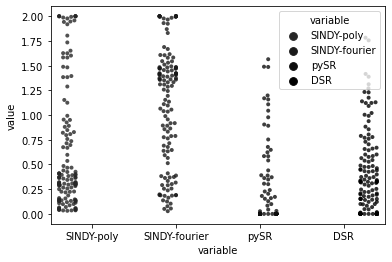

In [201]:
sns.set_style()
sns.swarmplot(data=data_long,  y="value", x="variable", hue="variable", 
              dodge=True, linewidth=0, size=4, alpha=0.8, color='k')

In [ ]:
sns.displot(data, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")

In [153]:
data["DSR"]

Aizawa                     3.249331e-01
AnishchenkoAstakhov        1.436066e-01
Arneodo                    1.413602e-17
ArnoldBeltramiChildress    1.546481e-01
ArnoldWeb                  9.986501e-02
                               ...     
WangSun                    9.921188e-01
WindmiReduced              7.043811e-01
YuWang                     2.220408e-01
YuWang2                    4.758330e-01
ZhouChen                   8.035604e-01
Name: DSR, Length: 131, dtype: float64

In [152]:
plt.hist(np.array(all_vals)[:, 0])
plt.hist(np.array(all_vals)[:, 2])
plt.hist(np.array(all_vals)[:, 3])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [5]:
np.median(np.array(all_vals), axis=0)

array([3.64590112e-01, 1.30863024e+00, 1.48616086e-06, 3.09681602e-01])

In [6]:
np.mean(np.array(all_vals), axis=0)

array([0.64209014, 1.10681756, 0.17108804, 0.38674856])

## Make training data

In [ ]:
import sys
import json
import os
import numpy as np


from dysts.base import get_attractor_list
from dysts.analysis import sample_initial_conditions
import dysts.flows

n_train = 150

all_train_test = dict()
for i, equation_name in enumerate(get_attractor_list()):
    
    all_train_test[equation_name] = dict()
    model = getattr(dysts.flows, equation_name)()
    
    np.random.seed(0)
    ic_train, ic_test = sample_initial_conditions(model, 2, traj_length=1000, pts_per_period=30)
    
    model.ic = ic_train
    tvals, sol = model.make_trajectory(n_train, pts_per_period=15, resample=True, return_times=True, standardize=False)
    dt = np.median(np.diff(tvals))
    dsol = np.vstack([model.rhs(val, 0) for val in sol])# * dt
    X_train, y_train = sol, dsol
    t_train = tvals

    model.ic = ic_test
    tvals, sol = model.make_trajectory(n_train, pts_per_period=15, resample=True, return_times=True, standardize=False)
    dt = np.median(np.diff(tvals))
    dsol = np.vstack([model.rhs(val, 0) for val in sol])# * dt
    X_test, y_test = sol, dsol
    t_test = tvals
    
    all_train_test[equation_name]["X_train"] = X_train.tolist()
    all_train_test[equation_name]["X_test"] = X_test.tolist()
    all_train_test[equation_name]["y_train"] = y_train.tolist()
    all_train_test[equation_name]["y_test"] = y_test.tolist()
    all_train_test[equation_name]["t_train"] = t_train.tolist()
    all_train_test[equation_name]["t_test"] = t_test.tolist()
    
    np.any(np.isnan(X_test)) or np.any(np.isnan(X_train))
    
# with open("./resources/symb_train_test_data.json", 'w') as file:
#     json.dump(all_train_test, file, indent=4)

In [ ]:
pip install pysr


# Learn equations
equations = pysr(
    X,
    y,
    niterations=5,
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",  # Pre-defined library of operators (see docs)
        "inv(x) = 1/x",  # Define your own operator! (Julia syntax)
    ],
)

In [4]:
help(model.fit)

Help on method fit in module dsr.task.regression.sklearn:

fit(X, y) method of dsr.task.regression.sklearn.DeepSymbolicRegressor instance



## Symbolic regression

Available benchmarks

+ Eureqa Python API (could not get this to work)
+ PySR
+ pySINDY
+ AI Feynman 2.0
+ Wolfram (only works on univariate problems)

In [67]:
help(pysr)

Help on function pysr in module pysr.sr:

pysr(X, y, weights=None, binary_operators=None, unary_operators=None, procs=4, loss='L2DistLoss()', populations=20, niterations=100, ncyclesperiteration=300, alpha=0.1, annealing=False, fractionReplaced=0.1, fractionReplacedHof=0.1, npop=1000, parsimony=0.0001, migration=True, hofMigration=True, shouldOptimizeConstants=True, topn=10, weightAddNode=1, weightInsertNode=3, weightDeleteNode=3, weightDoNothing=1, weightMutateConstant=10, weightMutateOperator=1, weightRandomize=1, weightSimplify=0.01, perturbationFactor=1.0, timeout=None, extra_sympy_mappings=None, extra_torch_mappings=None, extra_jax_mappings=None, equation_file=None, verbosity=1000000000.0, progress=None, maxsize=20, fast_cycle=False, maxdepth=None, variable_names=None, batching=False, batchSize=50, select_k_features=None, warmupMaxsizeBy=0.0, constraints=None, useFrequency=True, tempdir=None, delete_tempfiles=True, julia_optimization=3, julia_project=None, user_input=True, update=

In [68]:
?pysr

Signature:
pysr(
    X,
    y,
    weights=None,
    binary_operators=None,
    unary_operators=None,
    procs=4,
    loss='L2DistLoss()',
    populations=20,
    niterations=100,
    ncyclesperiteration=300,
    alpha=0.1,
    annealing=False,
    fractionReplaced=0.1,
    fractionReplacedHof=0.1,
    npop=1000,
    parsimony=0.0001,
    migration=True,
    hofMigration=True,
    shouldOptimizeConstants=True,
    topn=10,
    weightAddNode=1,
    weightInsertNode=3,
    weightDeleteNode=3,
    weightDoNothing=1,
    weightMutateConstant=10,
    weightMutateOperator=1,
    weightRandomize=1,
    weightSimplify=0.01,
    perturbationFactor=1.0,
    timeout=None,
    extra_sympy_mappings=None,
    extra_torch_mappings=None,
    extra_jax_mappings=None,
    equation_file=None,
    verbosity=1000000000.0,
    progress=None,
    maxsize=20,
    fast_cycle=False,
    maxdepth=None,
    variable_names=None,
    batching=False,
    batchSize=50,
    select_k_features=None,
    warmupMaxsizeBy

In [ ]:
ADD SORT KEYS TO CLUSTER PY FILE

In [3]:
# get data

import json
with open("./results/symbolic_scores_sweep.json", "r") as file:
    results_symb = json.load(file)

In [6]:
# with open("./results/symbolic_scores_sweep.json", "r") as file:
#     results_symb = json.load(file)
#     json.dump("./results/symbolic_scores_sweep.json", sort_keys=True)
    
# with open("./results/symbolic_scores_sweep.json", 'w') as f:
#     json.dump(results_symb, f, indent=4, sort_keys=True)

In [57]:
# Dataset
X = 2 * np.random.randn(100, 5)
y = 2 * np.cos(X[:, 3]) + X[:, 0] ** 2 - 2

# Learn equations
equations = pysr(
    X,
    y,
    niterations=5,
    binary_operators=["+", "*"],
    delete_tempfiles=True,
    verbosity=0,
    multithreading=False,
    unary_operators=[
        "cos",
        "exp",
        "sin",  # Pre-defined library of operators (see docs)
        "log",
        "tanh",
        "inv(x) = 1/x",  # Define your own operator! (Julia syntax)
    ],
)

# ...# (you can use ctl-c to exit early)

print(best(equations))

Killing process... will return when done.
x0**2


In [47]:
dd = dict()

dd.update({"tt" : 7})

In [48]:
dd

{'tt': 7}

In [18]:
X_train.shape

(150, 3)

In [19]:
y_train.shape

(150, 3)

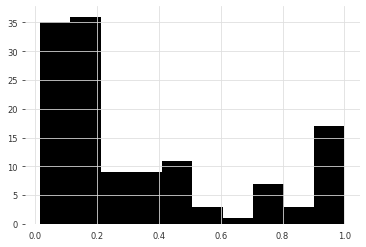

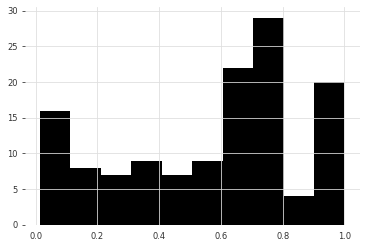

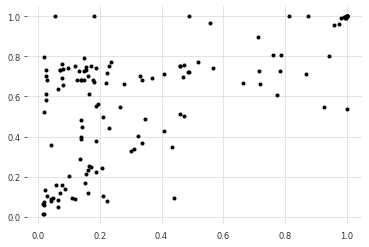

In [60]:
score_vals = np.array([(sym_scores[item]["SINDY-poly"], sym_scores[item]["SINDY-fourier"]) for item in sym_scores])

plt.figure()
plt.hist(score_vals[:, 0])

plt.figure()
plt.hist(score_vals[:, 1])

plt.figure()
plt.plot(*score_vals.T, '.');

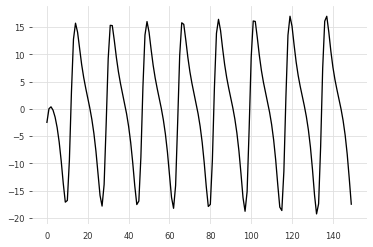

In [75]:
plt.plot(y_train[:, 1])

In [43]:
from pysr import pysr, best_callable

operator_list = [
            "cos",
            "exp",
            "sin",
            "log",
            "tanh",
            "inv(x) = 1/x",
        ]
# base operators +, −, ×, ÷,sin, cos, exp, log, x
pysr_opts = {
    "populations" : 3,  # number of workers, defaults to 20
    "niterations" : 5,
    "procs": 1, # number of threads
    "delete_tempfiles" : True,
    "verbosity": 0,
    "unary_operators" : operator_list,
    "binary_operators" : ["+", "*", "÷", "-"]
}

models = pysr(
    X_train[:10],
    y_train[:10, i],
    **pysr_opts
)
# print(best(equations))

y_test_pred = best_callable(models)(X_test)
# plt.plot(best_callable(equations)(y_test))


In [39]:
# try 100 points

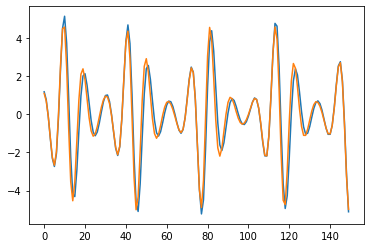

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(best_callable(equations)(X_test))
plt.plot(y_test[:, i])

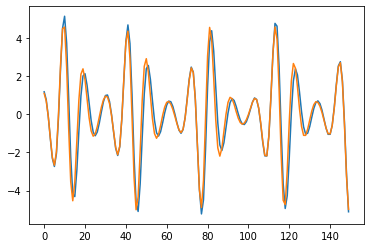

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(best_callable(equations)(X_test))
plt.plot(y_test[:, i])

In [29]:
equations[equations.score == equations.score.max()]["lambda_format"]

3    PySRFunction(X=>x0 - 3.5865989*x1)
Name: lambda_format, dtype: object

In [25]:
equations["score"]

0    0.000000
1    1.236611
2    0.037664
3    4.657180
4    0.082358
5    0.396391
6    0.006367
7    0.017575
Name: score, dtype: float64

In [23]:
equations#.lambda_format

,Complexity,MSE,score,Equation,sympy_format,lambda_format
0,1,2.714743,0.000000,0.18005764,0.180057640000000,PySRFunction(X=>0.180057640000000)
1,3,0.228887,1.236611,(x1 * -3.2937198),-3.2937198*x1,PySRFunction(X=>-3.2937198*x1)
2,4,0.220427,0.037664,(sin(x1) * -3.5874171),-3.5874171*sin(x1),PySRFunction(X=>-3.5874171*sin(x1))
3,5,0.002093,4.657180,((x1 * -3.5865989) + x0),x0 - 3.5865989*x1,PySRFunction(X=>x0 - 3.5865989*x1)
4,6,0.001927,0.082358,((x1 * -3.5550137) + sin(x0)),-3.5550137*x1 + sin(x0),PySRFunction(X=>-3.5550137*x1 + sin(x0))
5,7,0.001296,0.396391,(((x1 * -3.5874171) + -0.028219834) + x0),x0 - 3.5874171*x1 - 0.028219834,PySRFunction(X=>x0 - 3.5874171*x1 - 0.028219834)
6,12,0.001256,0.006367,(inv(inv(x1) * -0.24654017) + ((tanh(x1) * 0.5...,x0 + inv(-0.24654017*inv(x1)) + 0.55652875*tan...,PySRFunction(X=>x0 + inv(-0.24654017*inv(x1)) ...
7,13,0.001234,0.017575,(inv(inv(x1) * -0.24564007) + ((sin(sin(x1)) *...,x0 + inv(-0.24564007*inv(x1)) + 0.5780935*sin(...,PySRFunction(X=>x0 + inv(-0.24564007*inv(x1)) ...


## nODEs

In [4]:
y_train.shape

(150, 3)